In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import statsmodels.api as smd
from sklearn.linear_model import LogisticRegression
import scipy.stats as st
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
columns = ['id number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
dataset = pd.read_csv("breast-cancer-wisconsin.data.csv",sep = ',' , names= columns)
dataset

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [3]:
dataset.shape

(699, 11)

In [4]:
dataset.head()

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


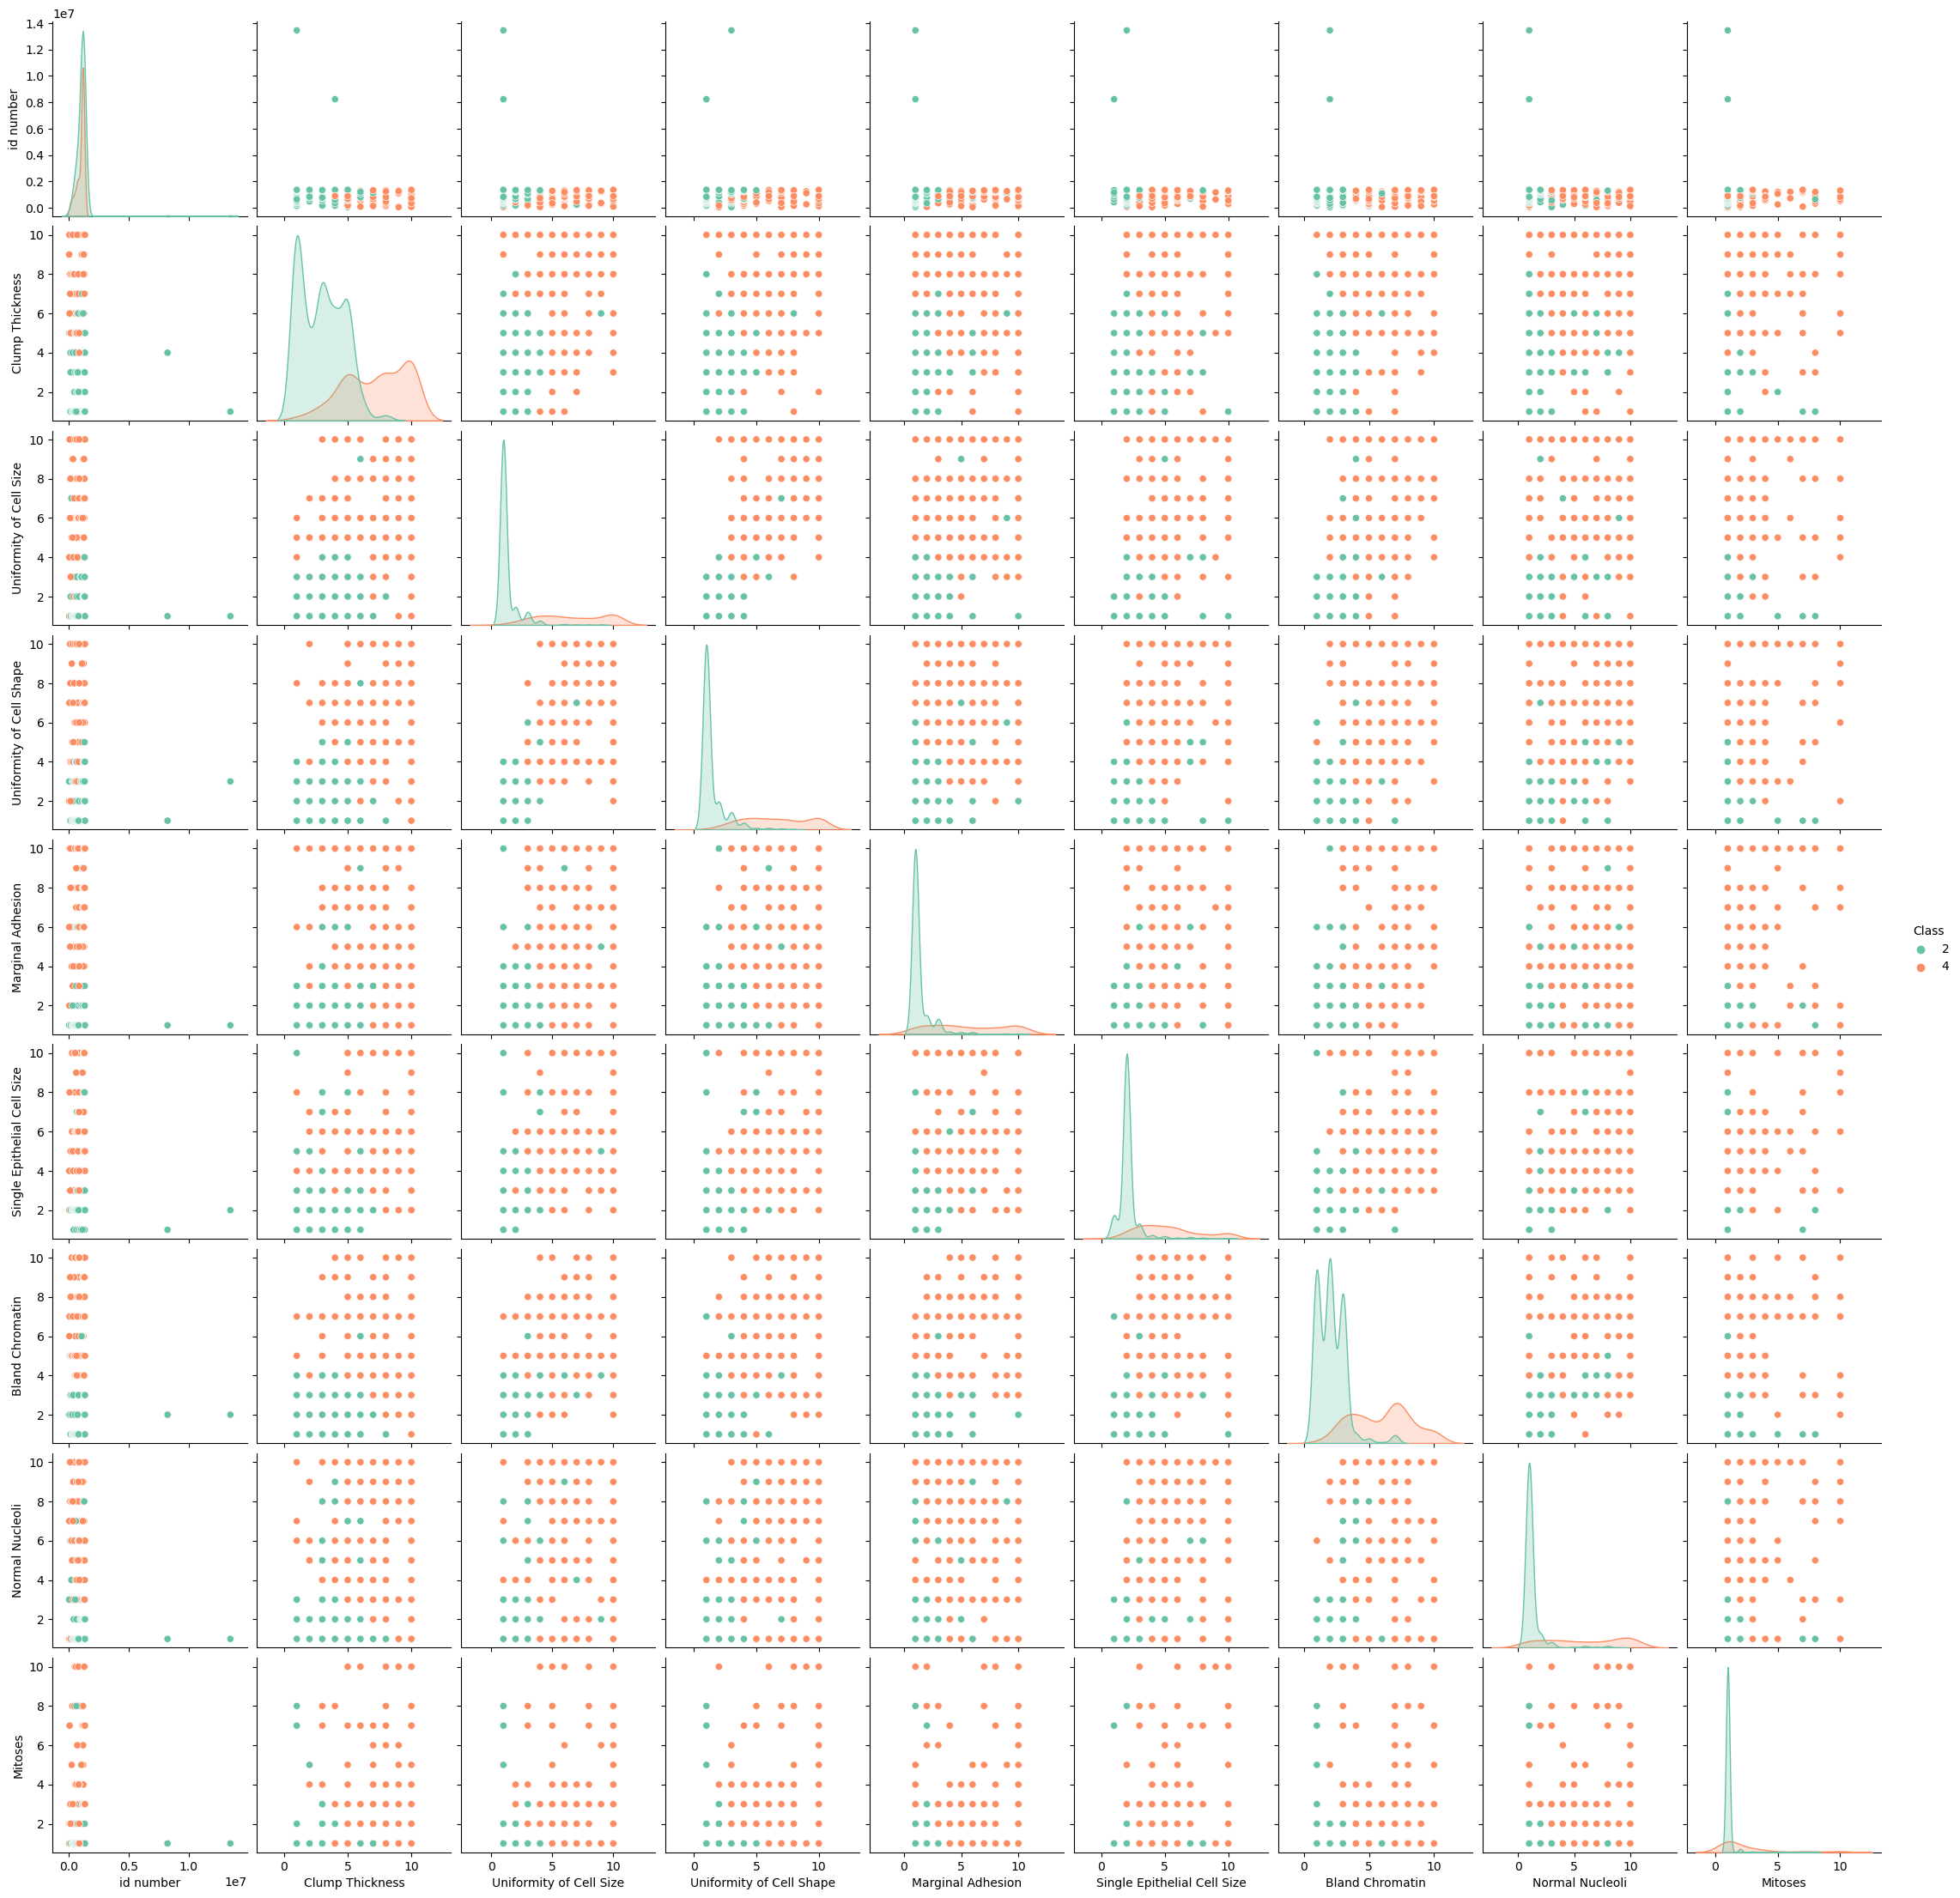

In [5]:
plt.rcParams['font.size']= 10
sns.pairplot(dataset,hue='Class', palette='Set2')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id number                    699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [7]:
for x in columns:
    print("Number of missing values in ", x, dataset[dataset[x] == '?'].shape[0])

Number of missing values in  id number 0
Number of missing values in  Clump Thickness 0
Number of missing values in  Uniformity of Cell Size 0
Number of missing values in  Uniformity of Cell Shape 0
Number of missing values in  Marginal Adhesion 0
Number of missing values in  Single Epithelial Cell Size 0
Number of missing values in  Bare Nuclei 16
Number of missing values in  Bland Chromatin 0
Number of missing values in  Normal Nucleoli 0
Number of missing values in  Mitoses 0
Number of missing values in  Class 0


In [8]:
dataset['Bare Nuclei'] = dataset['Bare Nuclei'].replace(to_replace='?',value = 0).astype(np.int64)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   id number                    699 non-null    int64
 1   Clump Thickness              699 non-null    int64
 2   Uniformity of Cell Size      699 non-null    int64
 3   Uniformity of Cell Shape     699 non-null    int64
 4   Marginal Adhesion            699 non-null    int64
 5   Single Epithelial Cell Size  699 non-null    int64
 6   Bare Nuclei                  699 non-null    int64
 7   Bland Chromatin              699 non-null    int64
 8   Normal Nucleoli              699 non-null    int64
 9   Mitoses                      699 non-null    int64
 10  Class                        699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


In [10]:
dataset.describe()

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.463519,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.640708,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [11]:
dataset.isnull().sum()

id number                      0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [12]:
dataset = dataset.drop(['id number'], axis=1)

In [13]:
dataset.Class.unique()

array([2, 4], dtype=int64)

In [14]:
dataset['Class'] = dataset['Class'].replace([2,4],[0,1])

In [15]:
dataset.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


Text(0, 0.5, 'Count of People')

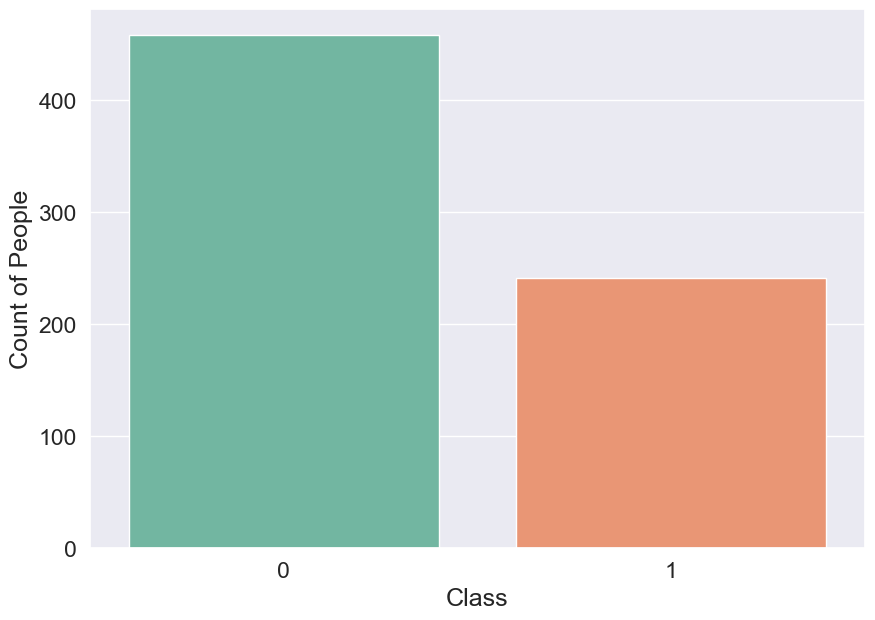

In [16]:
plt.figure(figsize=(10,7))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Class', data=dataset, palette="Set2")
plt.ylabel('Count of People')

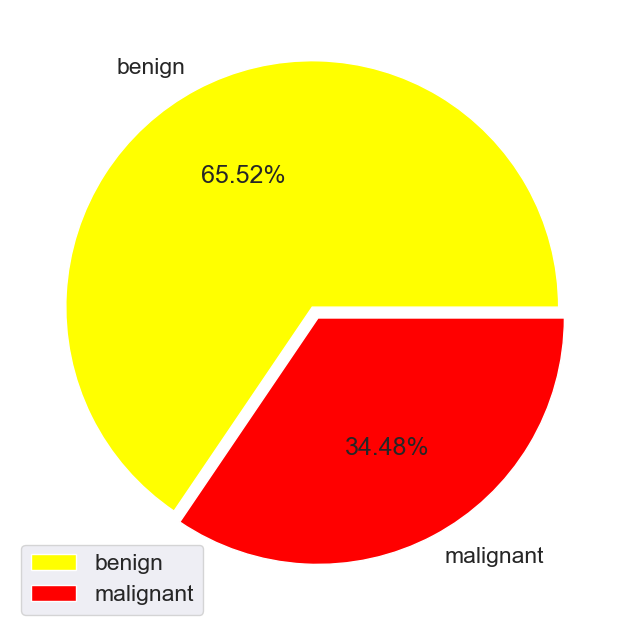

In [17]:
plt.figure(figsize=(8,8))
pieC = dataset['Class'].value_counts()
explode = (0.05, 0)
colors = ['yellow', 'red']
labels = ['benign', 'malignant']
sns.set(font_scale = 1.5)
plt.pie(pieC, labels = ('benign', 'malignant'), autopct = "%.2f%%", explode = explode, colors = colors)
plt.legend(labels, loc = 'lower left')

array([[<Axes: title={'center': 'Clump Thickness'}>,
        <Axes: title={'center': 'Uniformity of Cell Size'}>,
        <Axes: title={'center': 'Uniformity of Cell Shape'}>],
       [<Axes: title={'center': 'Marginal Adhesion'}>,
        <Axes: title={'center': 'Single Epithelial Cell Size'}>,
        <Axes: title={'center': 'Bare Nuclei'}>],
       [<Axes: title={'center': 'Bland Chromatin'}>,
        <Axes: title={'center': 'Normal Nucleoli'}>,
        <Axes: title={'center': 'Mitoses'}>],
       [<Axes: title={'center': 'Class'}>, <Axes: >, <Axes: >]],
      dtype=object)

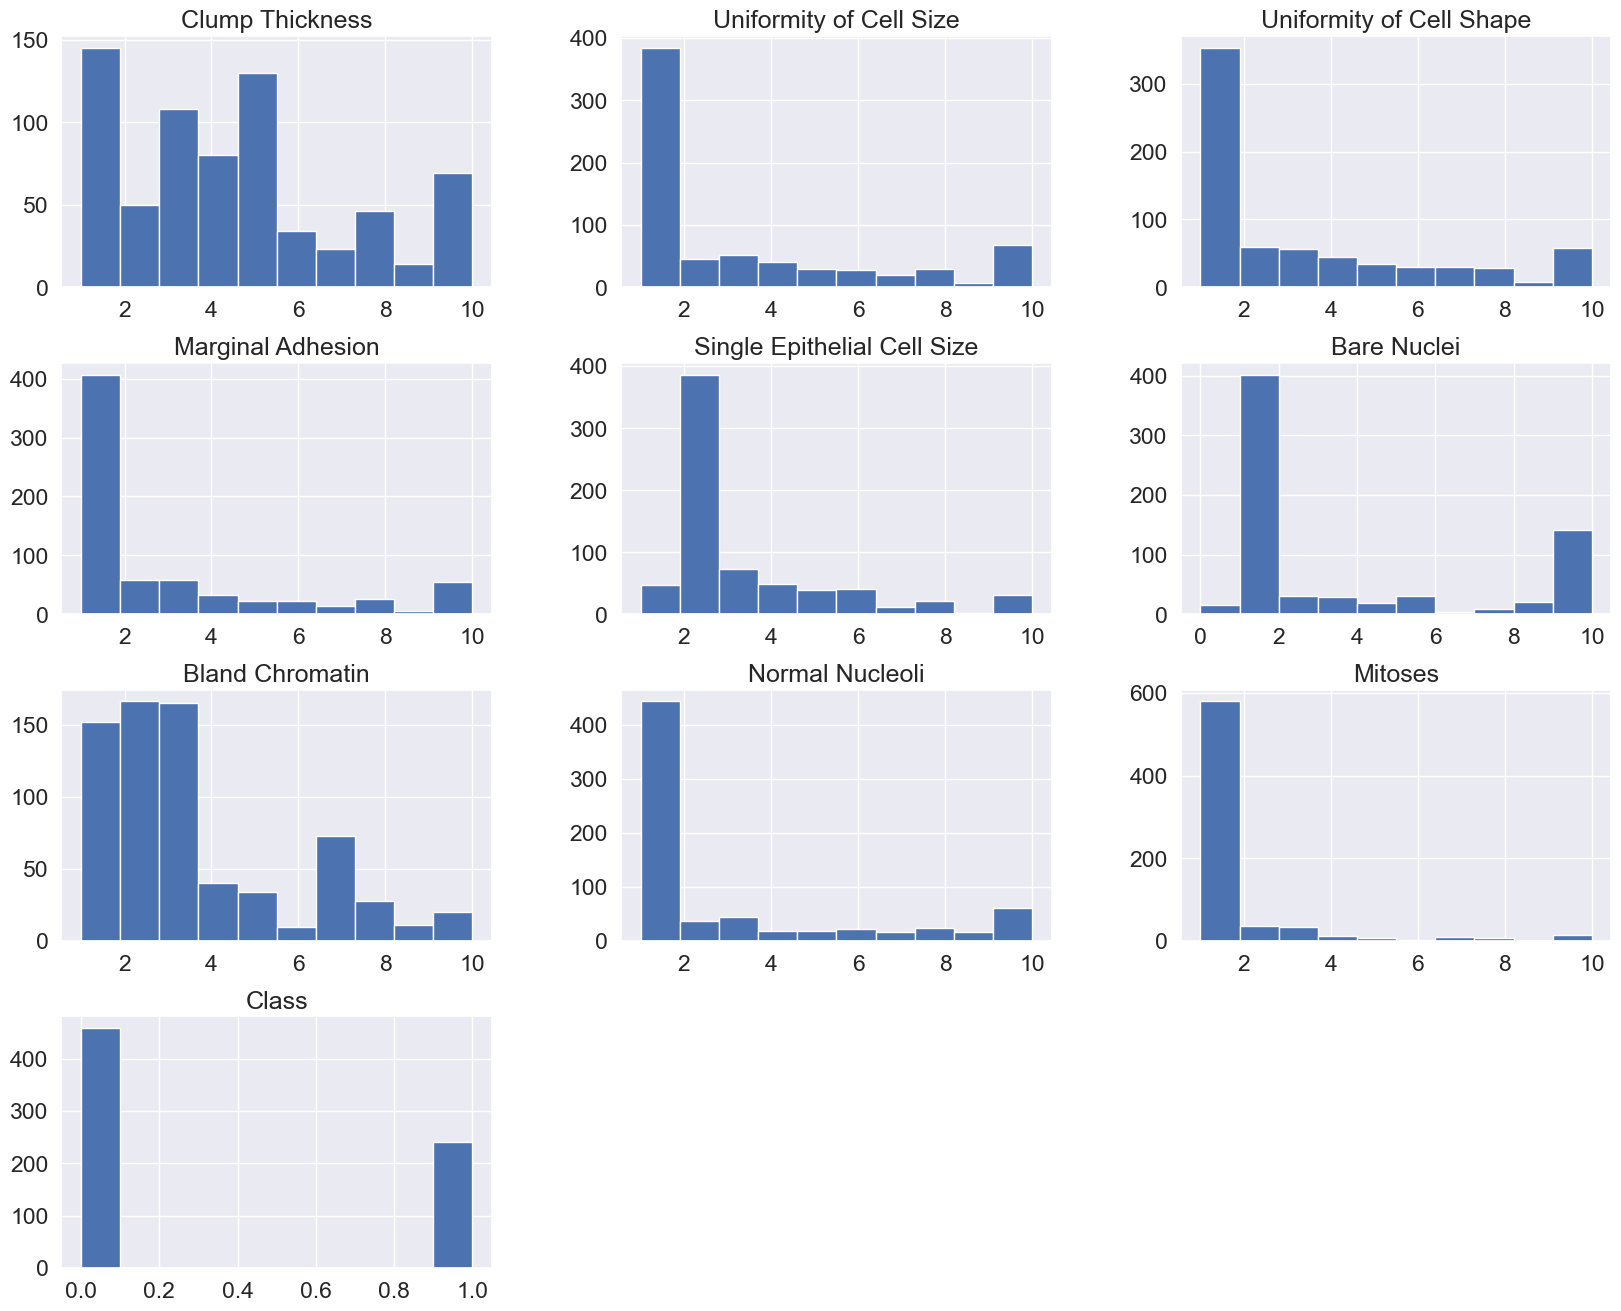

In [18]:
dataset.hist(figsize = (20,16),grid=True)

<Axes: xlabel='Class', ylabel='Density'>

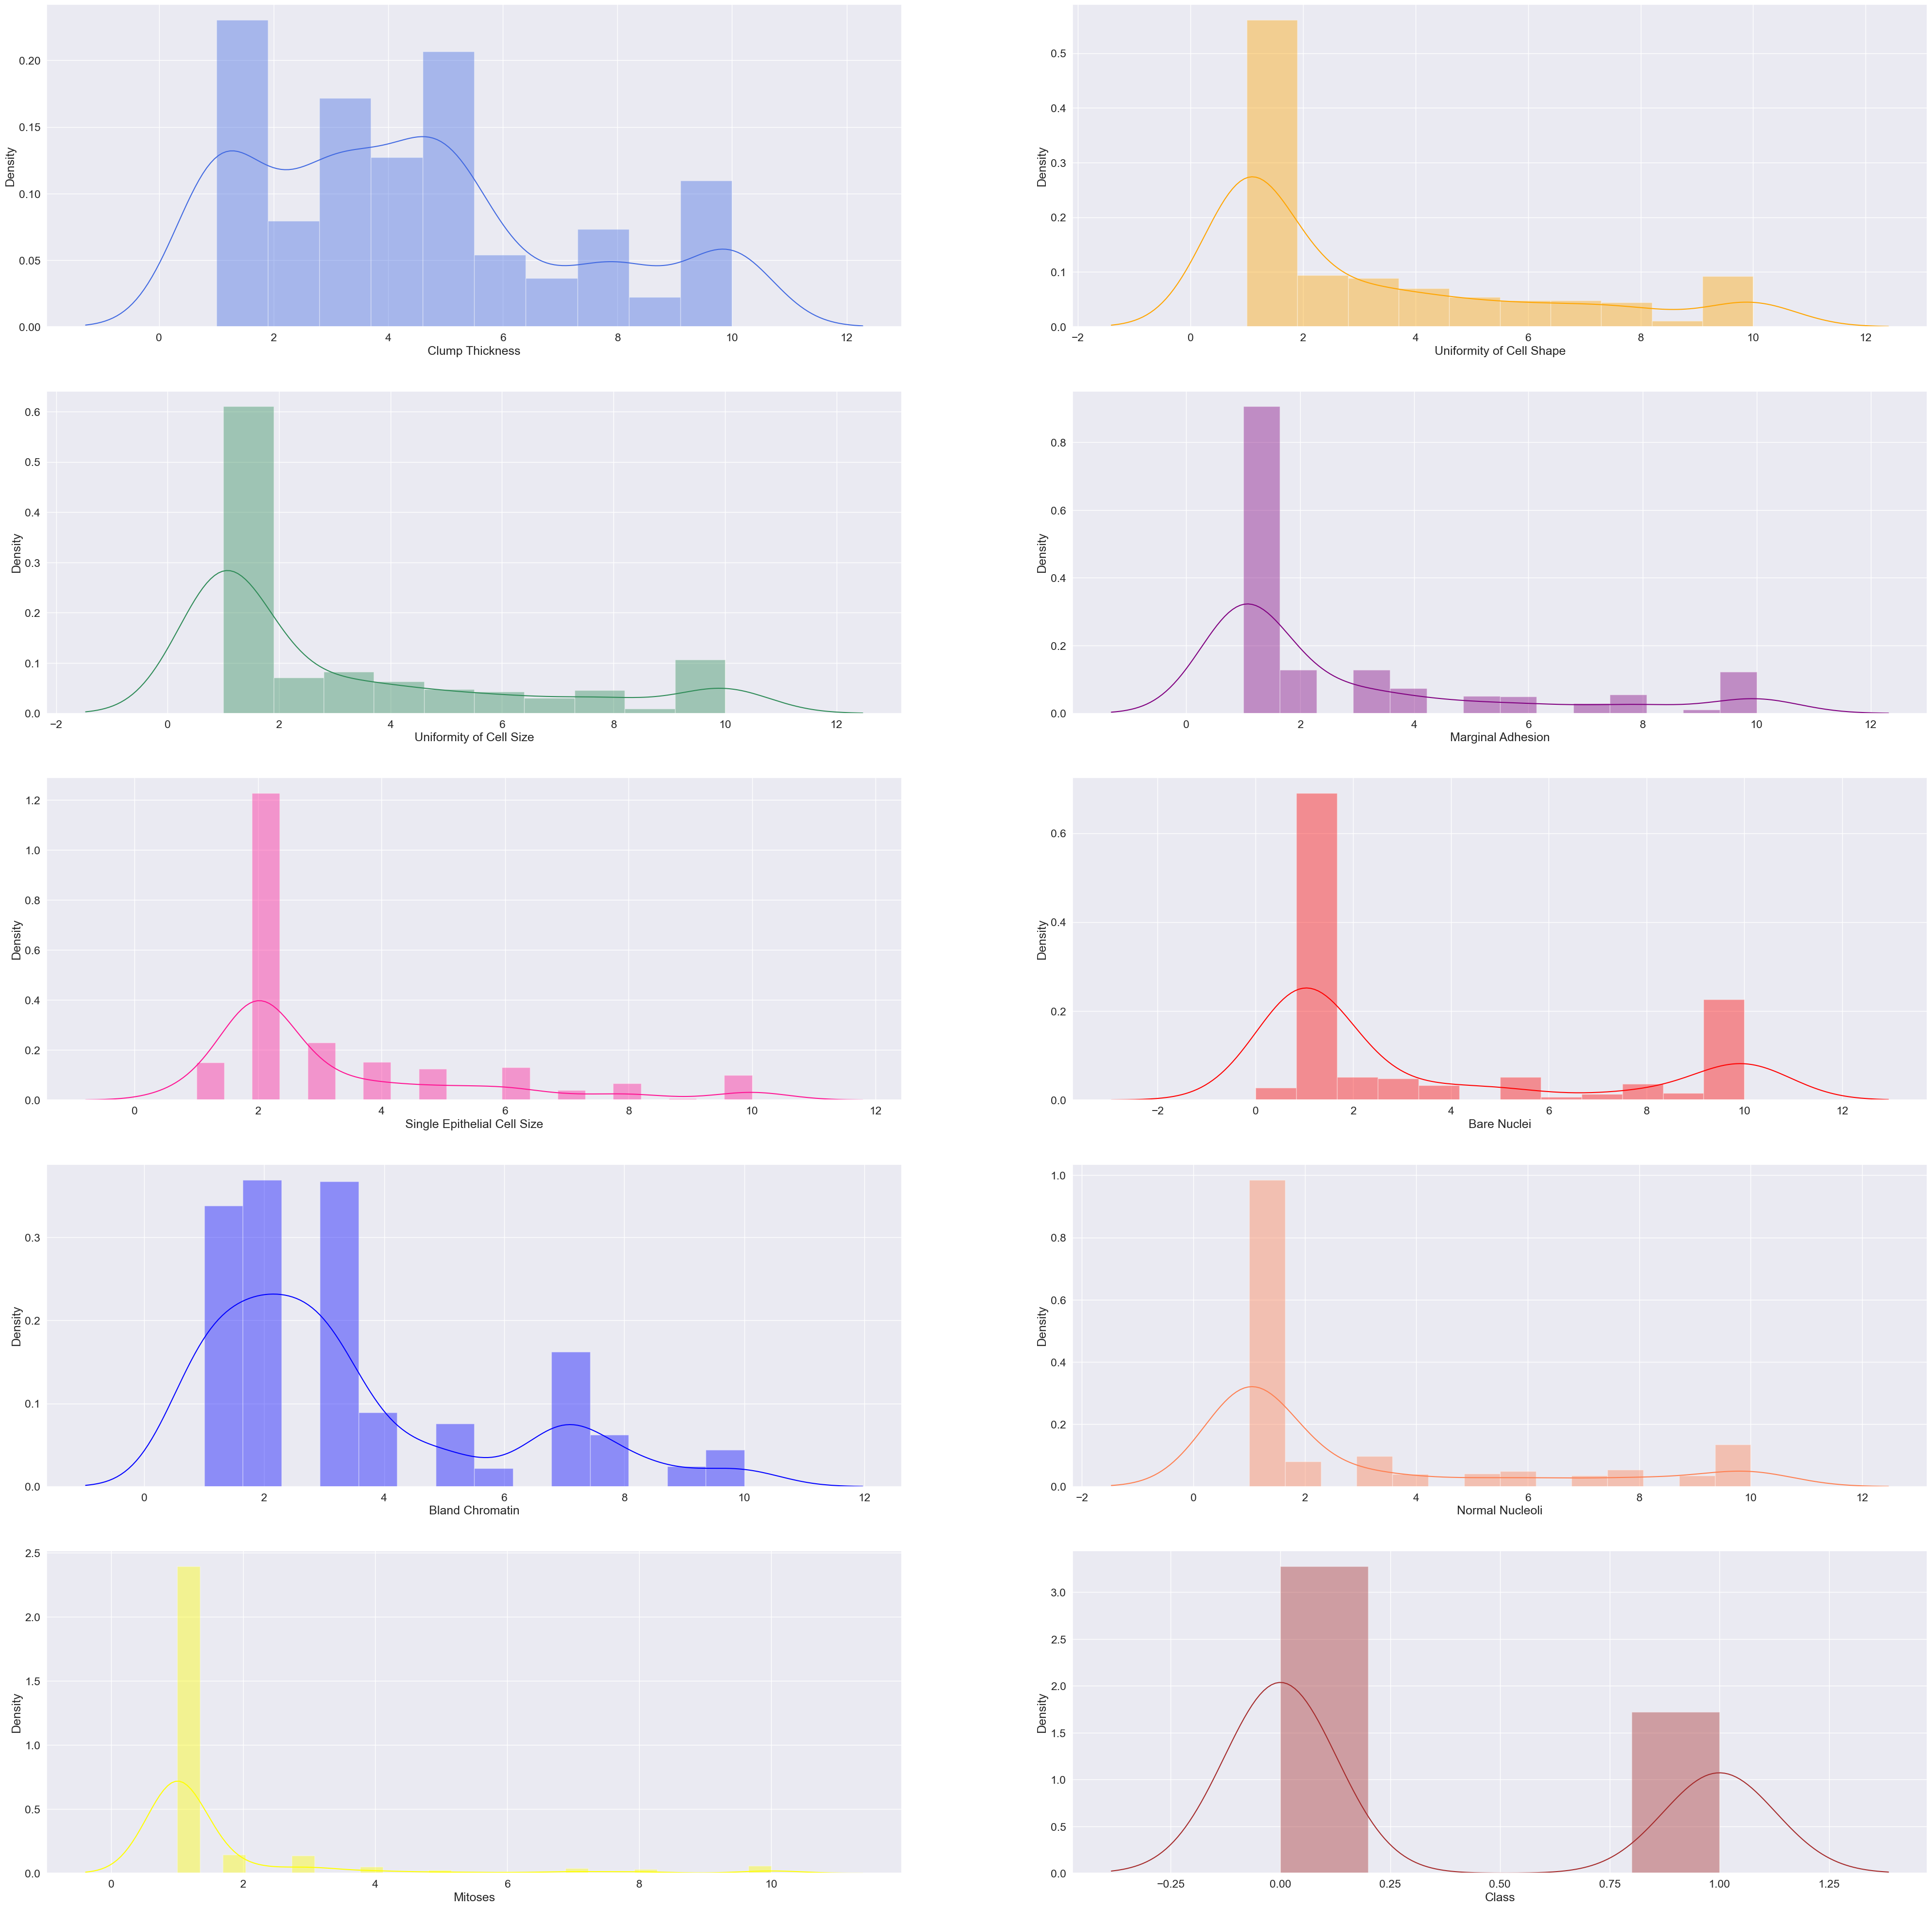

In [19]:
fig, ax = plt.subplots(5,2, figsize=(50,50))
sns.set(font_scale = 3)
sns.distplot(dataset['Clump Thickness'], ax = ax[0,0], color = 'royalblue')
sns.distplot(dataset['Uniformity of Cell Size'], ax = ax[1,0], color = 'seagreen')
sns.distplot(dataset['Uniformity of Cell Shape'], ax = ax[0,1], color = 'orange')
sns.distplot(dataset['Marginal Adhesion'], ax = ax[1,1], color = 'purple')
sns.distplot(dataset['Single Epithelial Cell Size'], ax = ax[2,0], color = 'deeppink')
sns.distplot(dataset['Bare Nuclei'], ax = ax[2,1], color = 'red')
sns.distplot(dataset['Bland Chromatin'], ax = ax[3,0], color = 'blue')
sns.distplot(dataset['Normal Nucleoli'], ax = ax[3,1], color = 'coral')
sns.distplot(dataset['Mitoses'], ax = ax[4,0], color = 'yellow')
sns.distplot(dataset['Class'], ax = ax[4,1], color = 'brown')

<Axes: xlabel='Clump Thickness', ylabel='count'>

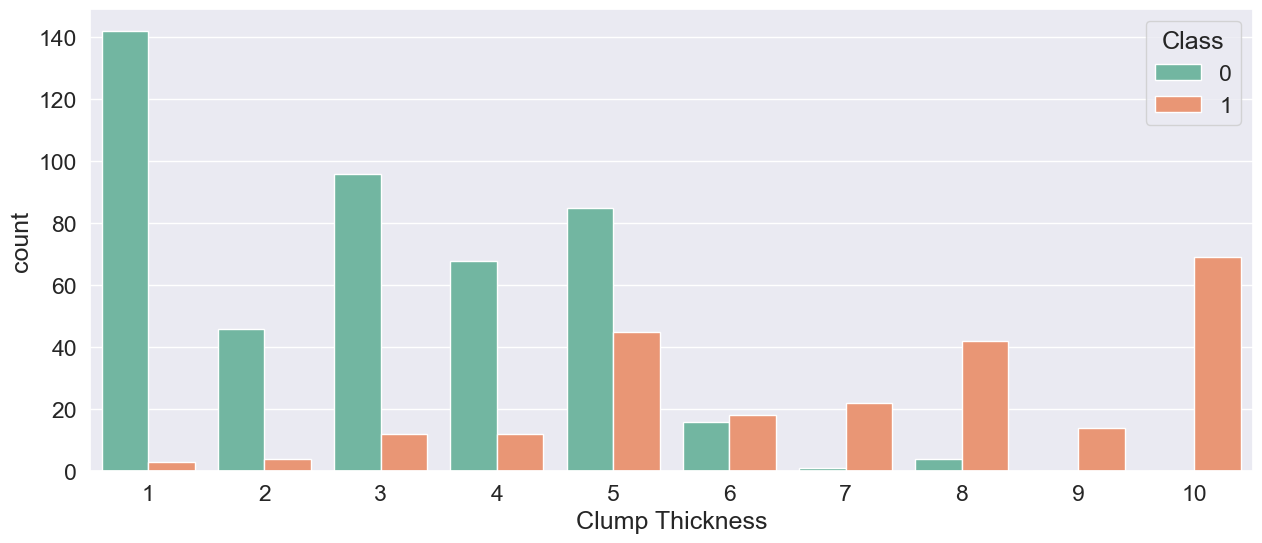

In [20]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Clump Thickness', hue = 'Class', data = dataset, palette = 'Set2')

<Axes: xlabel='Uniformity of Cell Size', ylabel='count'>

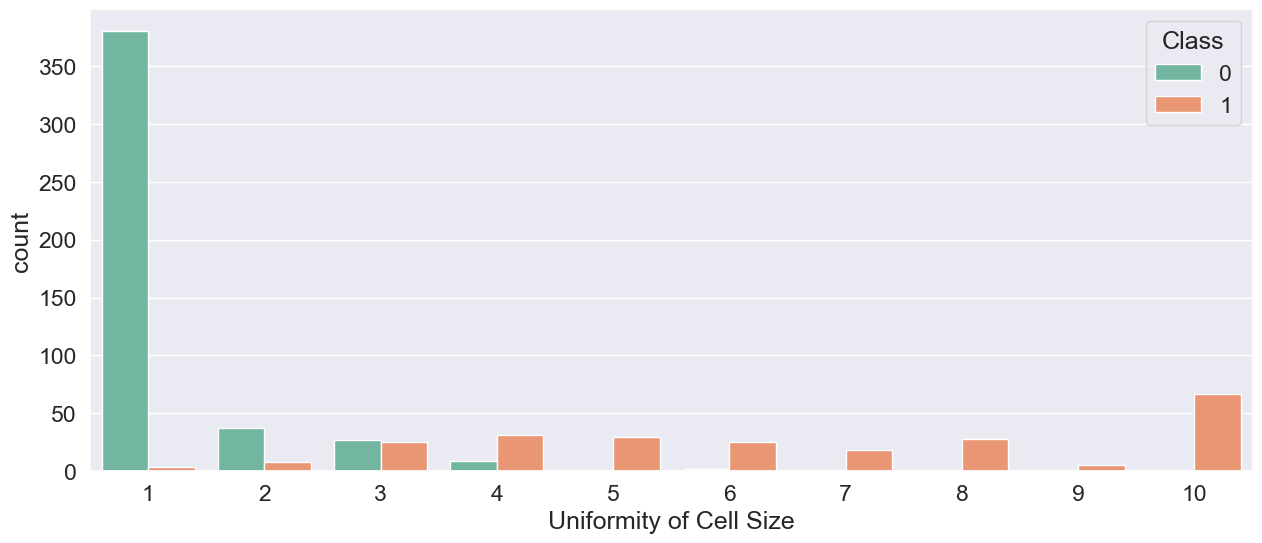

In [21]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Uniformity of Cell Size', hue = 'Class', data = dataset, palette = 'Set2')

<Axes: xlabel='Uniformity of Cell Shape', ylabel='count'>

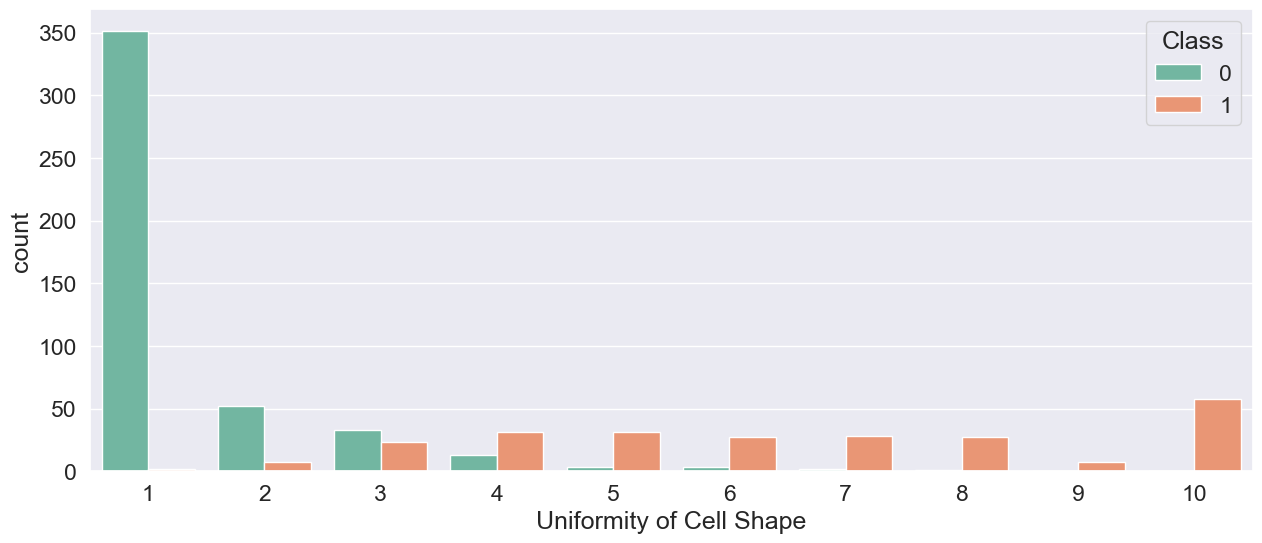

In [22]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Uniformity of Cell Shape', hue = 'Class', data = dataset, palette = 'Set2')

<Axes: xlabel='Marginal Adhesion', ylabel='count'>

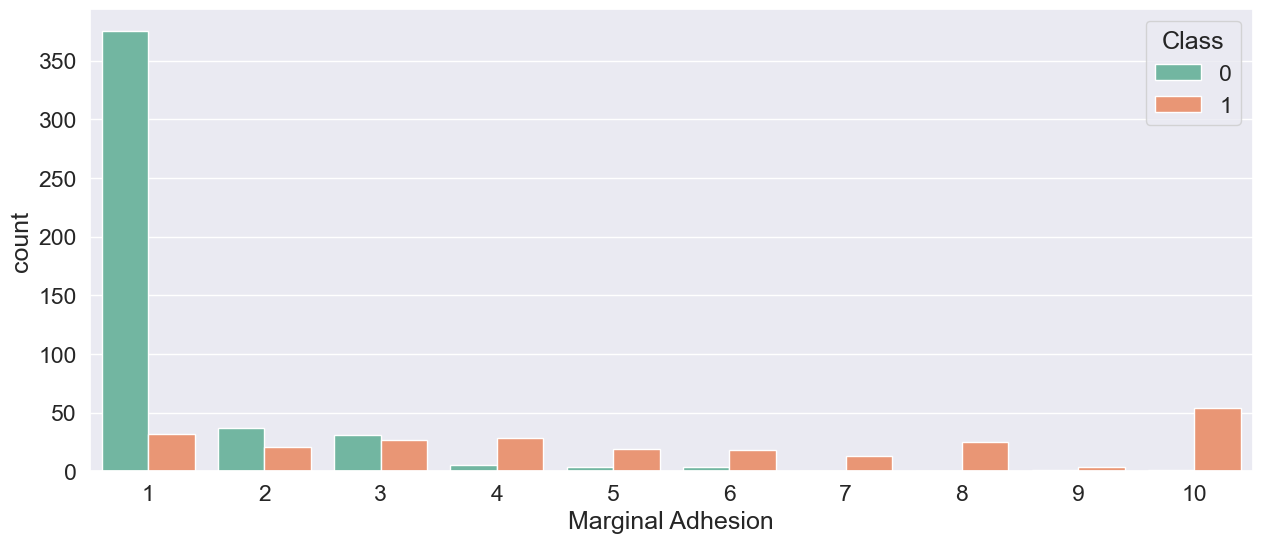

In [23]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Marginal Adhesion', hue = 'Class', data = dataset, palette = 'Set2')

<Axes: xlabel='Single Epithelial Cell Size', ylabel='count'>

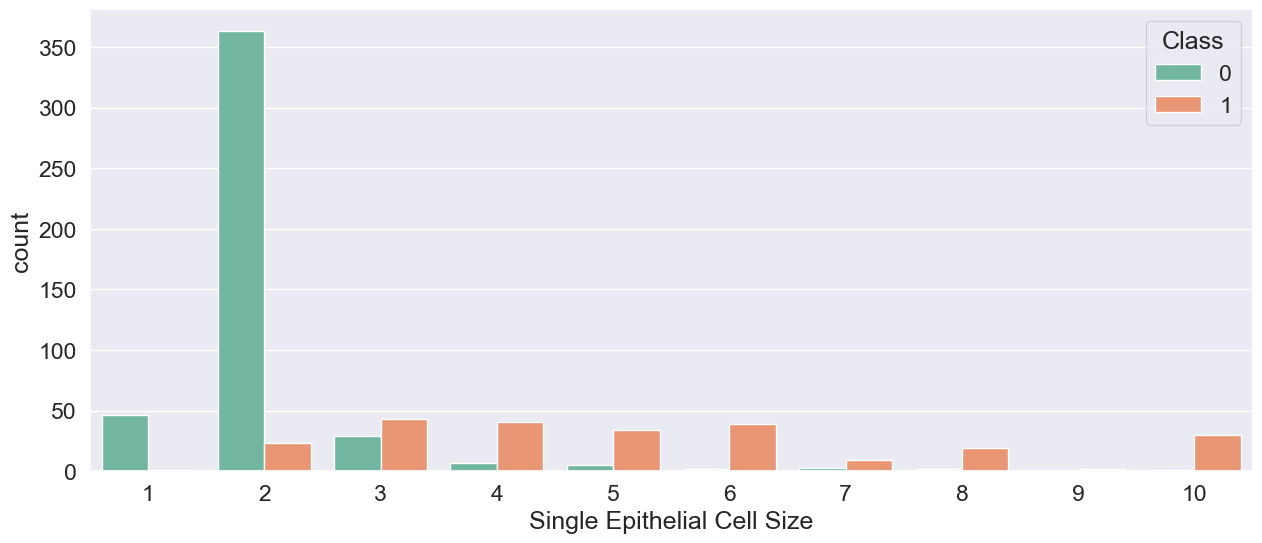

In [24]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Single Epithelial Cell Size', hue = 'Class', data = dataset, palette = 'Set2')

<Axes: xlabel='Bare Nuclei', ylabel='count'>

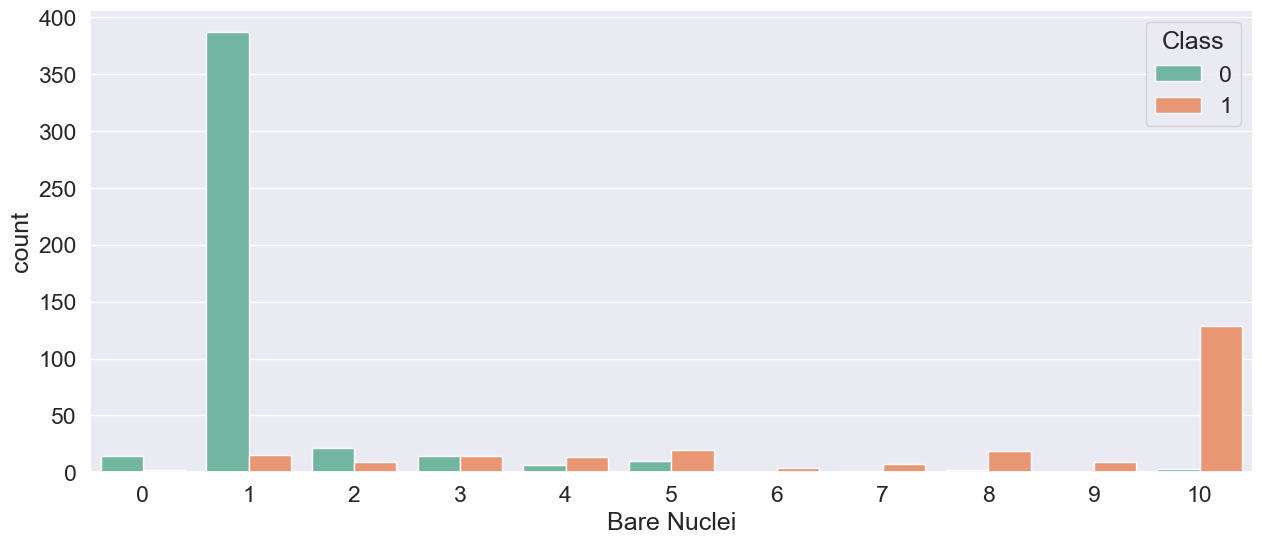

In [25]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Bare Nuclei', hue = 'Class', data = dataset, palette = 'Set2')

<Axes: xlabel='Bland Chromatin', ylabel='count'>

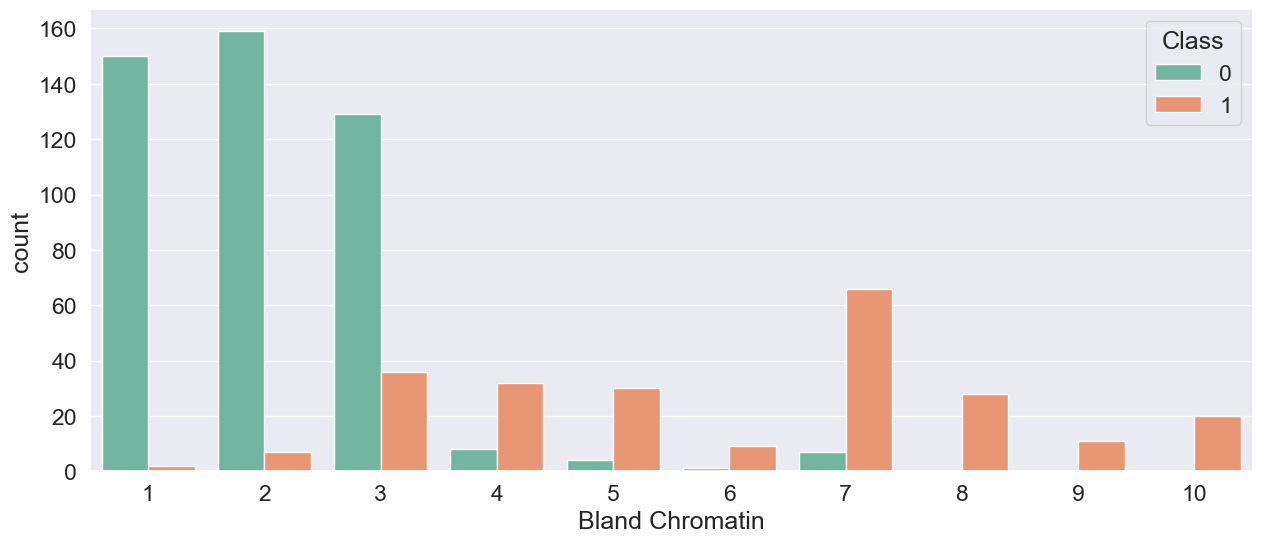

In [26]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Bland Chromatin', hue = 'Class', data = dataset, palette = 'Set2')

<Axes: xlabel='Normal Nucleoli', ylabel='count'>

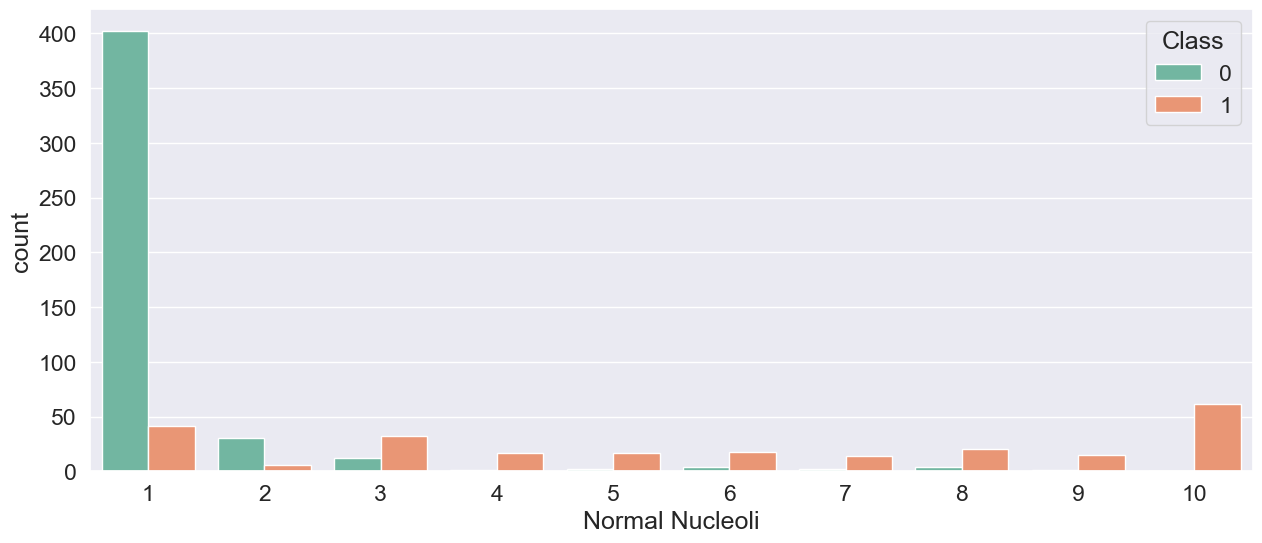

In [27]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Normal Nucleoli', hue = 'Class', data = dataset, palette = 'Set2')

<Axes: xlabel='Mitoses', ylabel='count'>

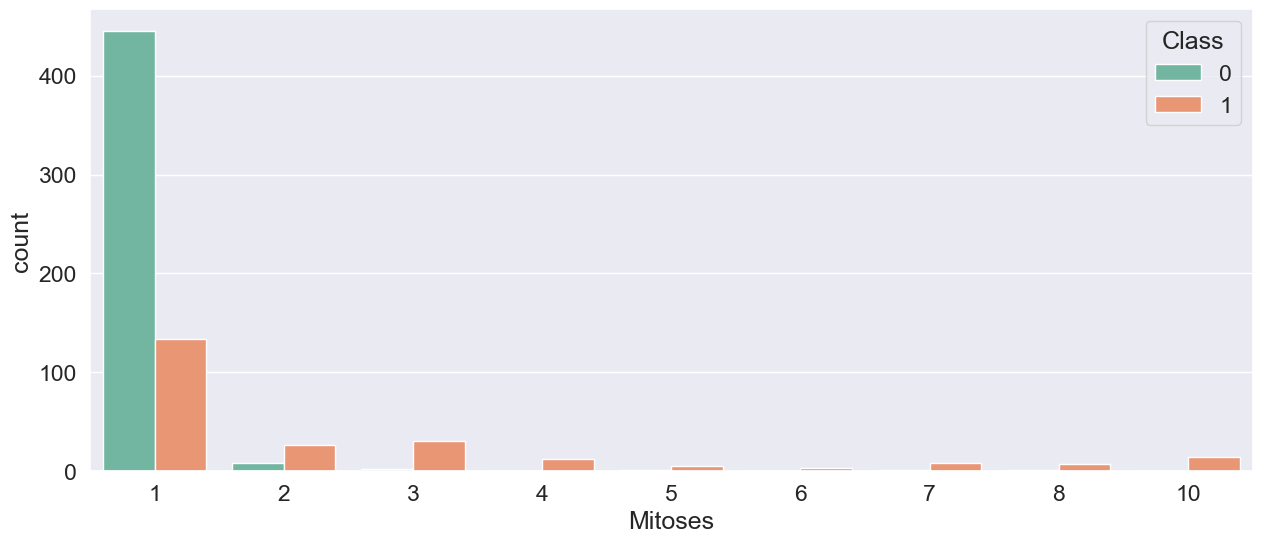

In [28]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Mitoses', hue = 'Class', data = dataset, palette = 'Set2')

In [29]:
X = dataset[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']]
y = dataset[['Class']]

In [30]:
X

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [36]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [37]:
y_train_pred = logreg.predict(X_train)

In [38]:
sklearn.metrics.accuracy_score(y_train, y_train_pred)

0.9713740458015268

<Axes: >

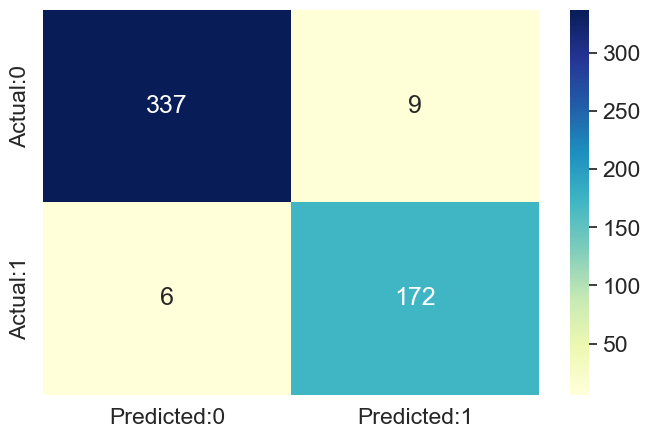

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [40]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [41]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'Missclassifications = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity/Recall or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Precision/Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.9713740458015268 
 Missclassifications = 1-Accuracy =  0.028625954198473247 
 Sensitivity/Recall or True Positive Rate = TP/(TP+FN) =  0.9662921348314607 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9739884393063584 
 Precision/Positive Predictive value = TP/(TP+FP) =  0.9502762430939227 
 Negative predictive Value = TN/(TN+FN) =  0.9825072886297376 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  37.14856429463169 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.03460807521755073


In [42]:
#Precision
cm[1,1]/(cm[0,1]+cm[1,1])

0.9502762430939227

In [43]:
#Recall
cm[1,1]/(cm[1,0]+cm[1,1])

0.9662921348314607

In [44]:
from sklearn import metrics

In [45]:
#Accuracy
metrics.accuracy_score(y_train, y_train_pred)

0.9713740458015268

In [46]:
log_reg=LogisticRegression()

In [47]:
scores = cross_val_score(log_reg, X_train, y_train, cv=10)

In [48]:
scores

array([0.90566038, 0.96226415, 0.96226415, 1.        , 0.96153846,
       0.96153846, 0.96153846, 0.98076923, 0.98076923, 0.96153846])

In [49]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.9056603773584906, 0.963788098693759, 1.0)

In [50]:
#model testing

In [51]:
y_pred_class=logreg.predict(X_test)

In [52]:
metrics.accuracy_score(y_test, y_pred_class)

0.9657142857142857

In [53]:
#Precision
cm[1,1]/(cm[0,1]+cm[1,1])

0.9502762430939227

In [54]:
#Recall
cm[1,1]/(cm[1,0]+cm[1,1])

0.9662921348314607

In [55]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[109,   3],
       [  3,  60]], dtype=int64)

In [56]:
from sklearn.metrics import confusion_matrix

<Axes: >

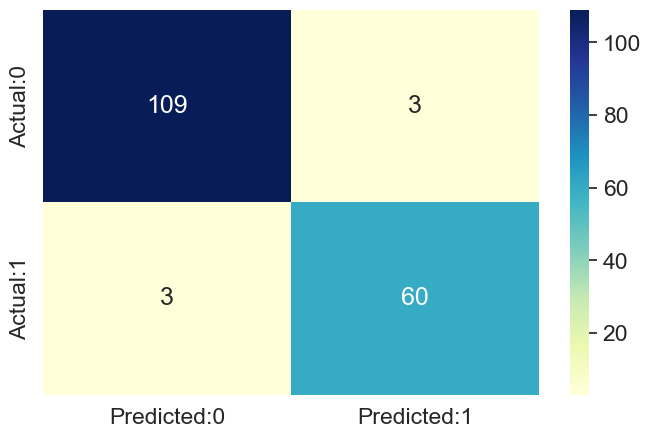

In [57]:
cm = confusion_matrix(y_test, y_pred_class)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [58]:
TP = cm[1,1]  
TN = cm[0,0] 
FP = cm[0,1] 
FN = cm[1,0]

In [59]:
y_test

,Class
476,0
531,0
40,0
432,0
14,1
...,...
247,1
690,0
673,0
202,0


In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc 
import matplotlib.pyplot as plt 
import random 
%matplotlib inline 

In [61]:
proba_cancer=logreg.predict_proba(X_test)[:,1]

In [62]:
roc_auc_score(y_test, proba_cancer)

0.9948979591836734

In [63]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, proba_cancer)
roc_auc = auc(false_positive_rate, true_positive_rate)

Text(0.5, 0, 'False Positive Rate')

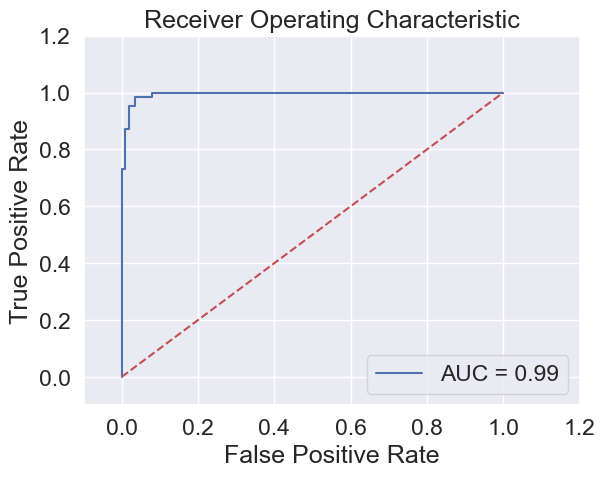

In [64]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [65]:
log_reg=LogisticRegression()

In [66]:
scores = cross_val_score(log_reg, X_test, y_test, cv=10)

In [67]:
scores

array([0.83333333, 0.94444444, 1.        , 1.        , 1.        ,
       0.94117647, 1.        , 1.        , 1.        , 0.88235294])

In [68]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.8333333333333334, 0.9601307189542485, 1.0)